# Chrono-SCore

This data is from GSE76118, analyzed by monocle3 5/3/2022. The experiment was a single cell sequencing of mouse heart data at embryonal days 8.5-10.5 (ESC - somewhat CM) They also included ESCs that they put through an artificial CM differentiation protocol. I took this data and filtered down to only Atrial CMs, then aligned it according to pseudotime predicted by monocle3. Now I used monocle to find genes that seem to be most correlated with pseudotime, cut them off at a q-value of 1e-7 (semi arbitrarly) and applied a filter to remove genes that got very high coefficients in the linear model. I also removed mitochondrial and Gm genes. 

After all this filtering I was left with the data found in ```data/genes_to_be_used_with_LM.csv```. 96 genes that potentially hold predictive power for pseudotime. I want to apply the skills learned through the four other tutorials to this dataset. Unfortunately this data is far too large to perform best subset on, but lets go ahead with forward selection.

In [4]:
library(leaps)
library(plyr)
library(dplyr)
Chrono <- read.table('./data//genes_to_be_used_with_LM.csv', sep=',')

## Forward-Selection

In [13]:
options(repr.matrix.max.cols=200)
head(Chrono)

,Hk2,Ddt,Srpk1,Crabp2,Atp5g1,Atp7b,Acot13,Actn1,Kdm6b,Tbx3,Hsf2,Actr2,Mdh1,Id2,Ssr1,Hmgcr,Mapk1ip1l,Dpysl2,Spry2,Oxct1,Zscan26,St13,Twf1,Rrn3,Gsk3b,Sod1,Ndufa5,Mpc1,Pim1,Strn,Impact,Dctn4,Pdcd4,Podxl,Acadl,Igfbp5,Ndufa10,Nmt2,Fubp3,Myef2,Mdk,Sall4,Skil,B4galt1,Mier1,Slc2a1,Gnb1,Actb,Tspan12,Cbx3,Abcc9,Sspn,Cox6a2,Acsl4,Adprhl1,Pkm,Amt,Chsy1,Lrrc58,Prtg,Fxyd1,Alpk3,Zfhx3,Fam60a,Arglu1,Wapl,Smpx,Nppa,Poldip3,Usp22,Alkbh5,X4933415A04Rik,Csnk2a2,Cd24a,Rbm15,Tigd2,Apoo.ps,Cited1,Slc39a1,Map1b,Msi1,Tug1,Hmga2,Ado,Sept11,Ndufs8,Wtap,Myl1,Pcnp,Bnip3,Kdelr2,Trim71,Apoo,Mpc1.ps,Ndufab1.ps,Rps19.ps6,Myl7,pseudotime
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
GSM2033420,21,0,4,2,21,9,1,4,10,4,0,11,25,7,21,2,2,54,2,3,3,13,4,4,15,41,8,0,4,9,11,2,1,2,3,25,5,11,1,1,7,0,0,3,5,10,28,45,1,0,0,0,14,0,0,20,4,3,14,6,7,29,9,3,13,0,1,0,10,23,3,7,10,6,6,0,0,0,3,49,0,5,15,3,11,6,4,25,6,5,5,3,0,0,0,0,303,0.006392671
GSM2033421,2911,13,3014,1,1497,345,134,502,109,0,315,2404,4076,431,7635,197,586,5923,205,127,313,2607,1349,1138,1320,6493,612,249,255,355,1878,698,22,93,462,211,1138,2150,201,382,991,375,465,734,496,1957,2683,5386,872,285,273,98,803,96,395,4863,894,474,961,484,214,1583,363,988,1721,421,2751,2521,2129,3217,253,537,325,1170,865,222,3,66,821,3635,40,2584,431,2406,1856,1031,353,975,982,1274,4298,270,216,73,19,65,30051,2.642300560
GSM2033422,1253,6,374,119,1207,611,61,53,69,106,69,1122,1807,913,139,165,86,5784,122,246,355,222,708,436,596,3387,121,33,437,254,561,93,79,316,122,750,302,673,6,39,923,423,184,364,416,1931,1174,6742,281,68,0,1,1007,56,29,5564,63,182,375,259,343,3620,271,208,414,114,71,26,1401,716,243,863,52,142,58,0,0,3,541,1919,1,402,561,346,1131,184,55,1520,258,1220,1732,601,15,11,2,59,46699,0.006405941
GSM2033423,184,18,81,23,114,3,8,17,33,0,16,37,99,0,93,32,26,404,23,17,46,82,36,32,67,221,28,5,22,25,77,6,0,7,3,1,27,74,12,28,71,0,7,13,7,266,102,377,33,3,0,0,67,5,0,774,13,11,43,49,15,202,2,58,32,10,178,533,46,88,30,18,60,17,16,21,0,0,18,135,1,30,25,106,77,59,0,137,60,57,117,25,3,2,1,5,3254,2.494515495
GSM2033424,48,18,40,15,150,2,15,15,5,17,2,58,188,68,40,0,6,165,3,20,7,15,22,4,42,171,17,1,9,0,1,0,0,10,16,80,70,23,0,5,111,0,1,46,0,209,47,43,7,1,0,0,144,1,0,315,7,5,8,2,9,119,4,26,26,5,20,0,57,24,19,34,5,49,6,4,0,0,12,36,1,16,31,14,16,19,8,59,23,89,35,22,8,2,2,1,3913,0.006419211
GSM2033425,72,2,70,0,67,0,3,14,14,4,2,52,253,2,40,0,12,71,3,14,44,32,10,7,61,153,11,6,1,40,18,0,7,0,23,209,31,54,2,13,44,4,5,23,21,4,54,283,20,8,0,0,11,8,8,147,17,5,19,0,1,24,0,22,23,4,0,4,17,62,8,37,20,2,12,1,1,1,10,131,0,25,9,53,24,26,0,0,22,36,24,6,7,3,2,0,976,3.693091998


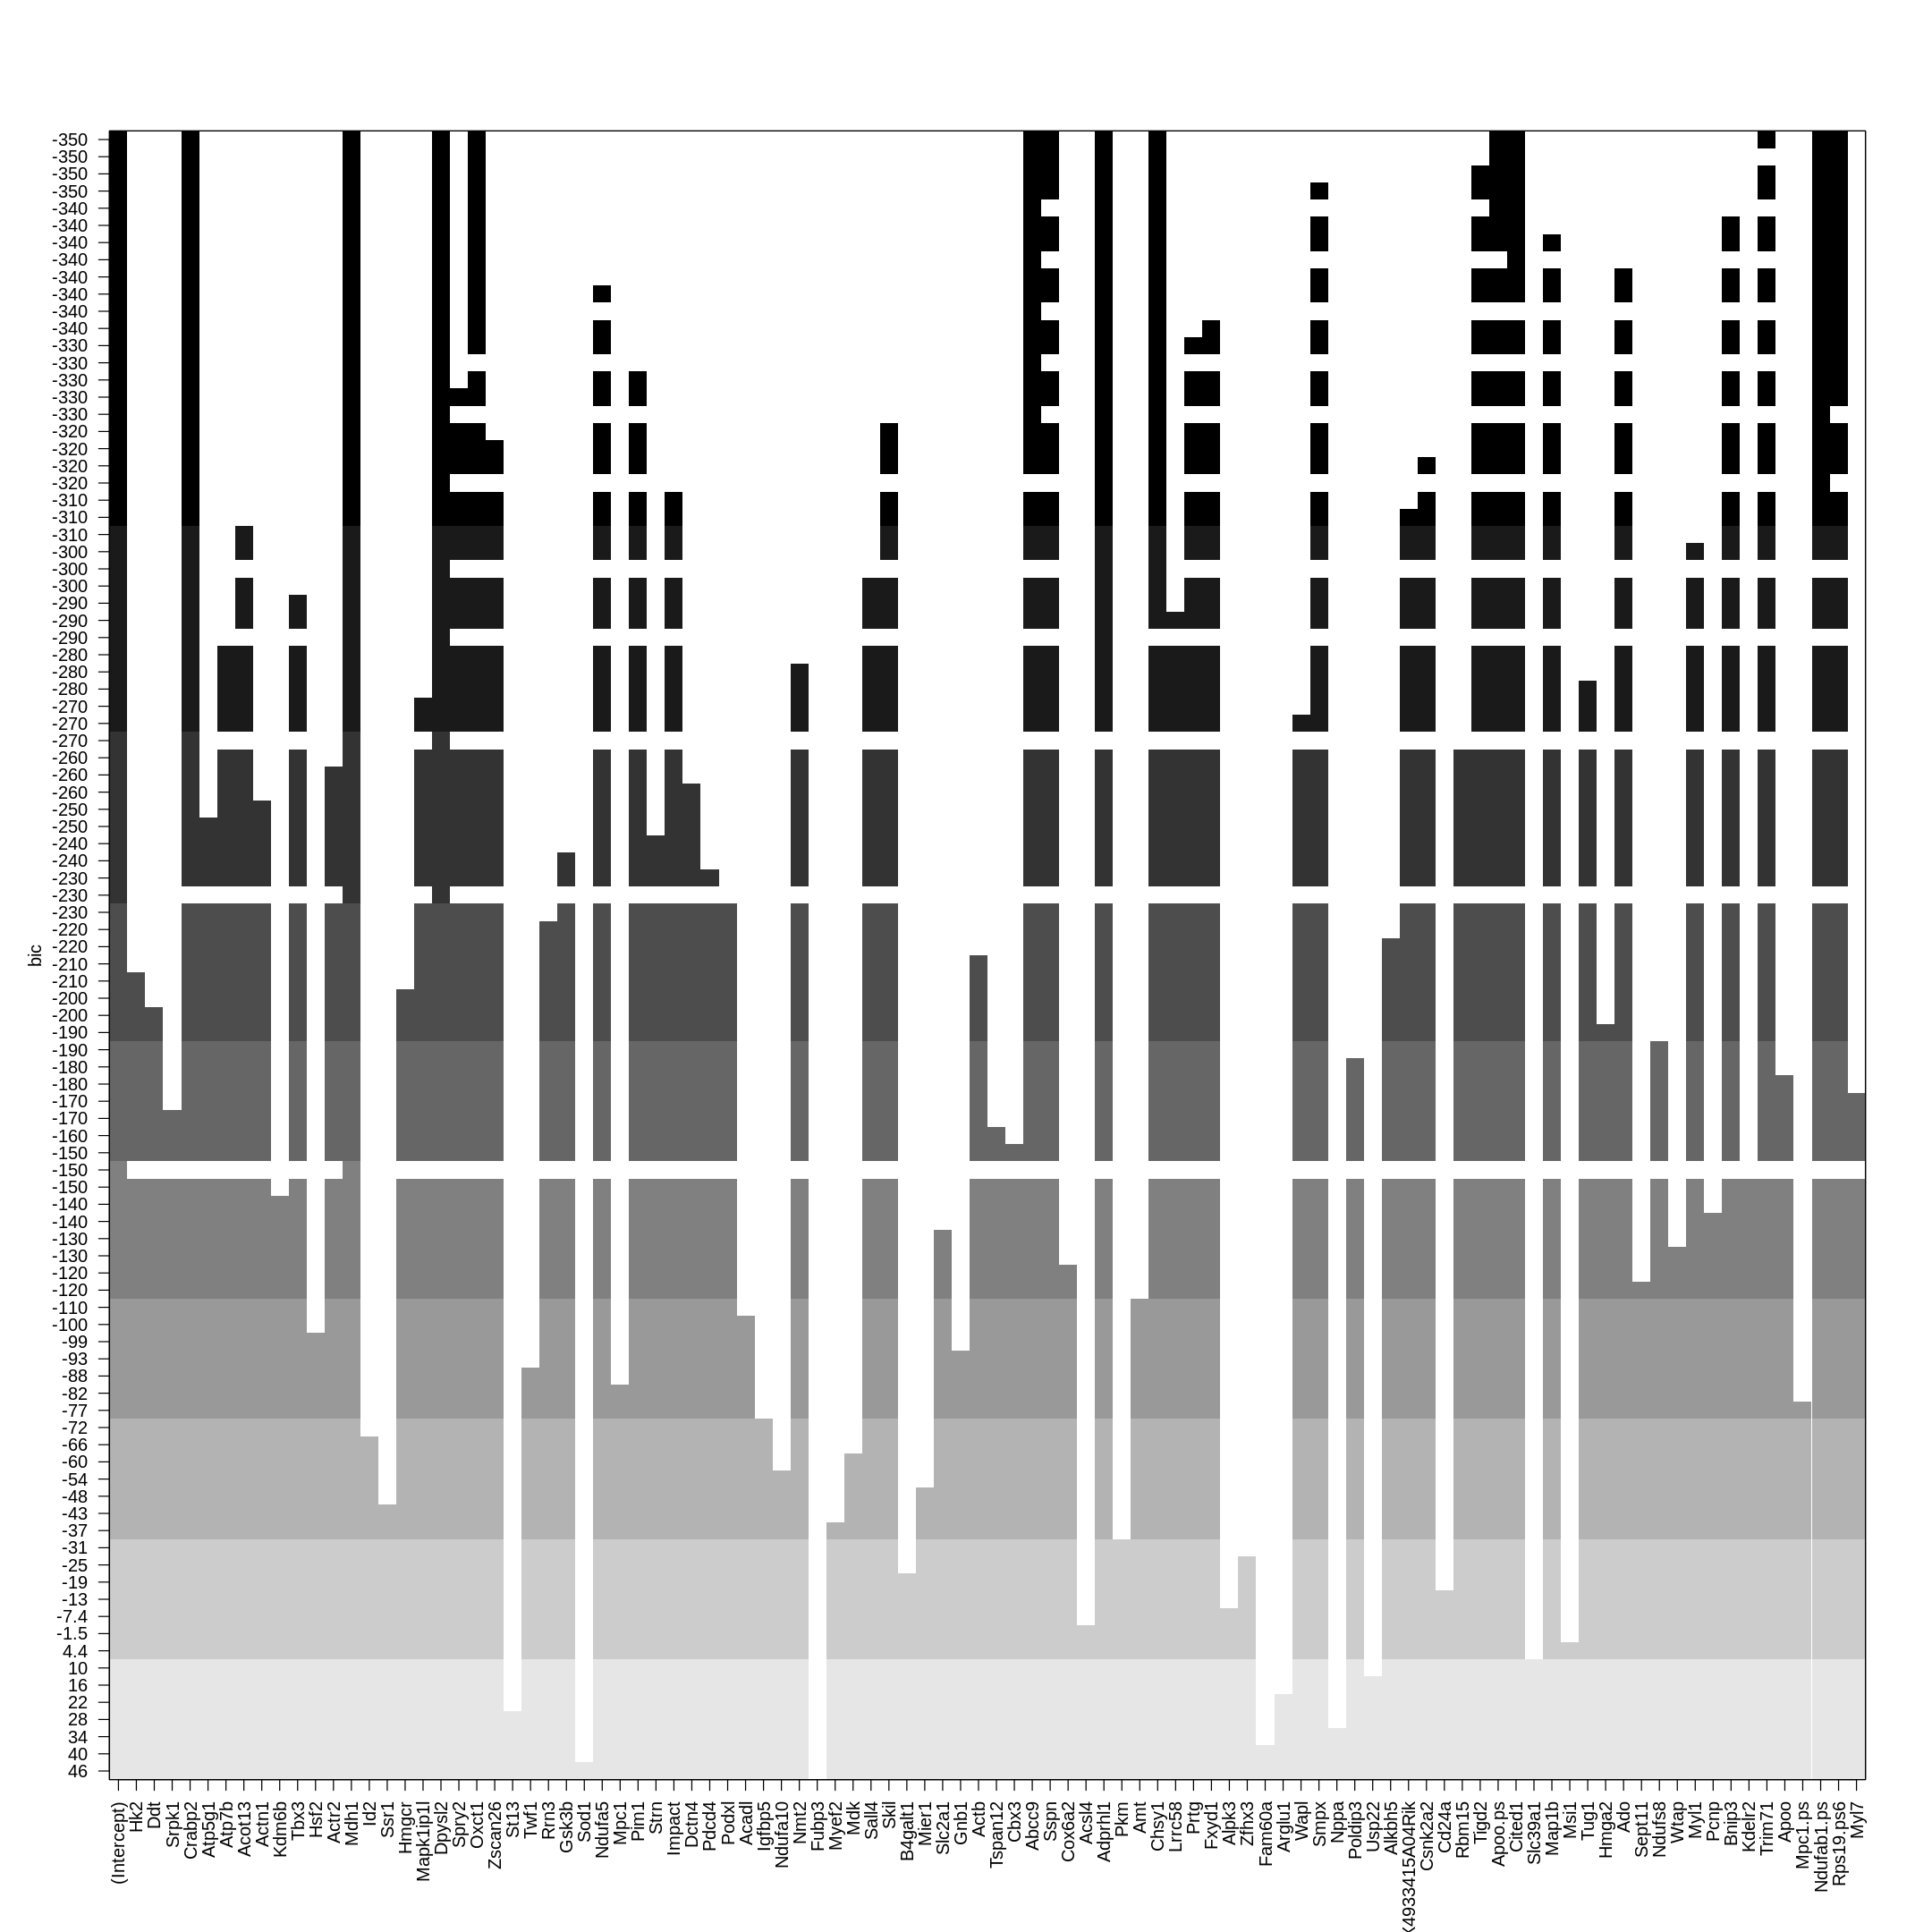

In [48]:
regfit.fwd <- regsubsets(pseudotime~., data = Chrono,nvmax = 96, method = 'forward')
regfit.fwd.summary <- summary(regfit.fwd)
options(repr.plot.width=18, repr.plot.height = 18)
plot(regfit.fwd, scale='bic')
options(repr.plot.width=6, repr.plot.height = 6)

In [49]:
names(regfit.fwd.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] "The lowest point is for a model with 13 features"


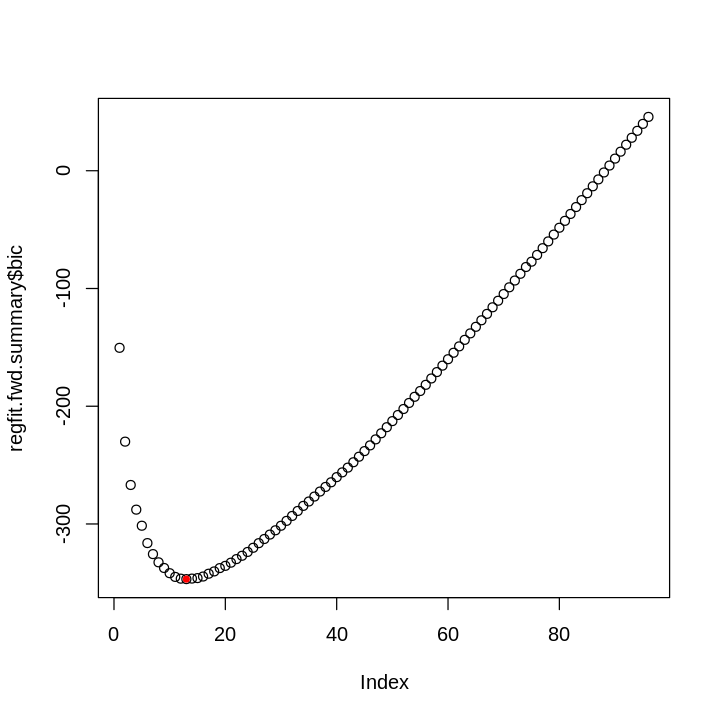

In [50]:
plot(regfit.fwd.summary$bic)
print(paste0("The lowest point is for a model with ", which.min(regfit.fwd.summary$bic), " features"))
points(x=which.min(regfit.fwd.summary$bic), y = regfit.fwd.summary$bic[which.min(regfit.fwd.summary$bic)], col='red', pch=20)

In [54]:
thing <- data.frame('bic' = regfit.fwd.summary$bic, 'nFeatures' = 1:96)
thing[order(thing$bic),]

,bic,nFeatures
,<dbl>,<int>
13,-346.8362,13
12,-346.4463,12
14,-346.3858,14
15,-345.9803,15
11,-344.9646,11
16,-344.6386,16
17,-342.2496,17
10,-341.8097,10
18,-340.2957,18


In [53]:
print("Best model")
names(coef(regfit.fwd, 13))

print("Somewhat good model (fewer features)")
names(coef(regfit.fwd, 4))

[1] "Best model"


[1] "(Intercept)" "Crabp2"      "Mdh1"        "Dpysl2"      "Oxct1"      
 [6] "Abcc9"       "Sspn"        "Adprhl1"     "Chsy1"       "Apoo.ps"    
[11] "Cited1"      "Trim71"      "Ndufab1.ps"  "Rps19.ps6"

[1] "Somewhat good model (fewer features)"


[1] "(Intercept)" "Crabp2"      "Mdh1"        "Dpysl2"      "Adprhl1"

### Conclusions

It seems like models without a lot of predictors (according to the BIC metric which biases toward having smaller models) do a good deal better than larger models. Looking at these genes, the majority of them seem to be involved with energy metabolism!

## Validation

I just finished the tutorial on how to use a validation set, so let us implement it!

The first thing we must do is look at the dimension of our original dataset and split it into 2/3 training and 1/3 test data

In [16]:
dim(Chrono)
# 380 98

set.seed(1)
training.index <- sample(seq(380), size = 253, replace = F)
training <- Chrono[training.index,]

dim(training)

[1] 380  98

[1] 253  98

Now that we have a training set, lets make a ```regsubset``` object like we normally would

In [150]:
regfit <- regsubsets(pseudotime~.^2, data=training, nvmax = 252, method = 'forward')
options(repr.plot.width=18, repr.plot.height = 7)
#plot(regfit, type = 'bic')
options(repr.plot.width=6, repr.plot.height = 6)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“4501  linear dependencies found”
Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“nvmax reduced to  252”
Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“number of items to replace is not a multiple of replacement length”


However, now instead of evaluating how this set of models did during training, lets look at our reserved set of data, not used in training. We will do this in a for loop, so lets make a vector for saving the test.errors, and turn the remaining test points into a matrix.

In [151]:
model.err <- rep(NA, 252)
x.test <- model.matrix(as.formula(regfit$call[[2]]), data=Chrono[-training.index,])

Now in the for loop, we are looping across all the models found in ```regfit```. Each model has coefficients we want, and we will create a vector of pseudotimes, which we will check against the actual pseudotimes found in Chrono, to finally update ```model.err``` with one MSE value.

In [152]:
for(i in 1:252){
    # First lets get the coefficients
    coefi <- coef(regfit, id = i)
    # With the coefficeints, lets matrix multiply that into the relevant columns x rows of training data x.test and get a vector of predictions
    predi <- x.test[,names(coefi)]%*%coefi
    model.err[[i]] <- mean((Chrono$pseudotime[-training.index] - predi)^2)
}

[1] "Model with the best performance on the validation set contains: 8 features"
[1] "Crabp2"        "Mdh1"          "Dpysl2"        "Smpx"         
[5] "Hmga2"         "Crabp2:Dpysl2" "Mdh1:Smpx"     "Pkm:Smpx"     


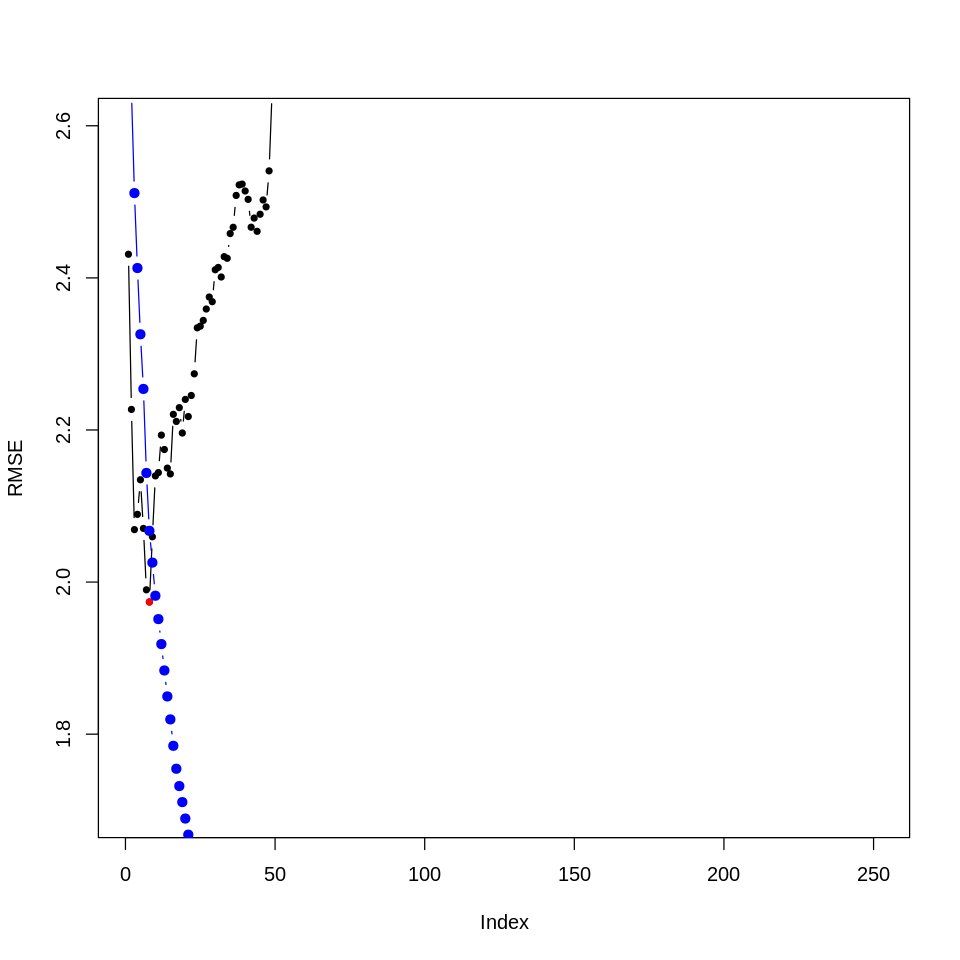

In [153]:
options(repr.plot.height = 8, repr.plot.width=8)
plot(sqrt(model.err), pch=20, type='b', ylab='RMSE', ylim=c(1.7,2.6))
print(paste0("Model with the best performance on the validation set contains: ", which.min(sqrt(model.err))," features with RMSE of: ", round(sqrt(model.err)[which.min(sqrt(model.err))], 3)))
print(names(coef(regfit, id=which.min(sqrt(model.err))))[-1])
points(x=which.min(sqrt(model.err)), y= sqrt(model.err)[which.min(sqrt(model.err))], col='red', pch=20)
points(sqrt(regfit$rss[-1]/180), col='blue', pch=19, type='b')

### Conclusions

Using just 1 validation set, we get a lot of variability! Sometimes the best subset is 7 genes, sometimes it is 27. We need to use CV to really say something! Looking at an unadjusted RSS, we see a constantly decreasing function, very different from what we see with the validation error.

### Putting it all into one cell

[1] 380  98

[1] "Model with the best performance on the validation set contains: 10 features with RMSE of: 1.843"
 [1] "Crabp2"    "Mdh1"      "Dpysl2"    "Oxct1"     "Abcc9"     "Adprhl1"  
 [7] "Smpx"      "Apoo.ps"   "Hmga2"     "Rps19.ps6"


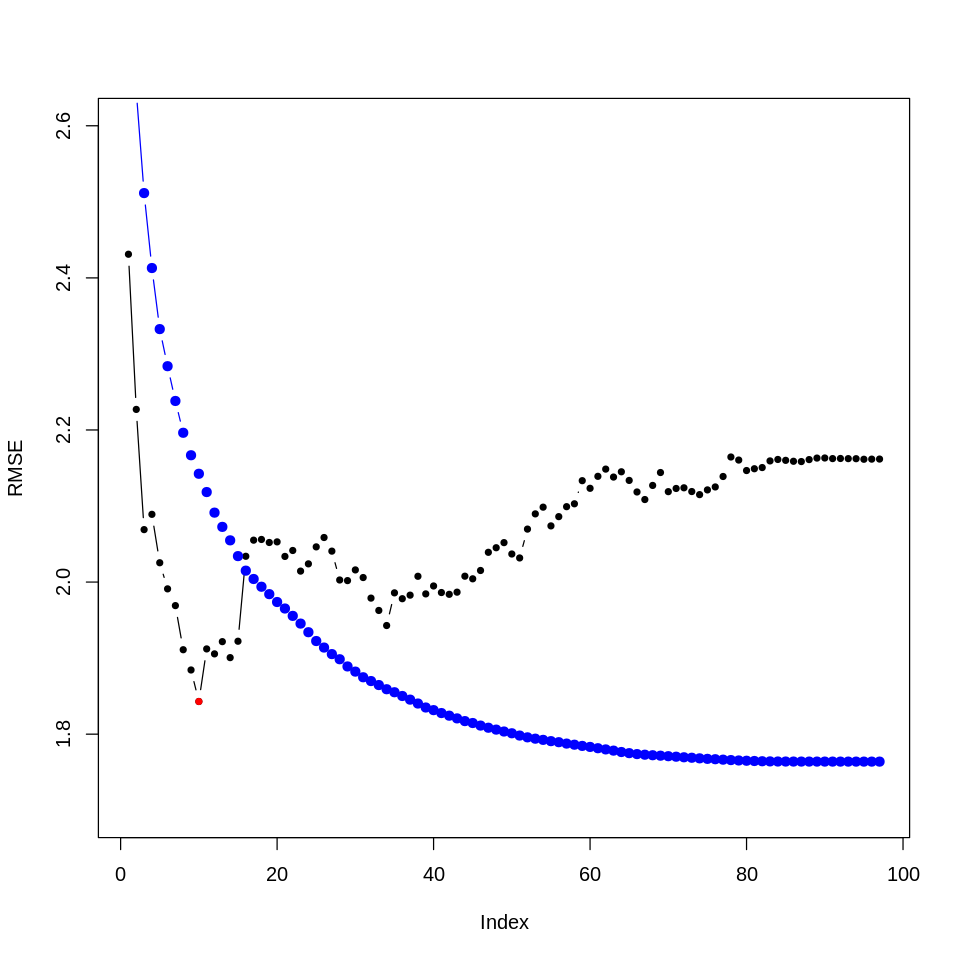

In [3]:
dim(Chrono)
# 380 98

set.seed(1)
training.index <- sample(seq(380), size = 253, replace = F)
training <- Chrono[training.index,]

regfit <- regsubsets(pseudotime~., data=training, nvmax = 97, method = 'forward')

model.err <- rep(NA, regfit$nvmax-1)
x.test <- model.matrix(as.formula(regfit$call[[2]]), data=Chrono[-training.index,])

for(i in 1:(regfit$nvmax-1)){
    # First lets get the coefficients
    coefi <- coef(regfit, id = i)
    # With the coefficeints, lets matrix multiply that into the relevant columns x rows of training data x.test and get a vector of predictions
    predi <- x.test[,names(coefi)]%*%coefi
    model.err[[i]] <- mean((Chrono$pseudotime[-training.index] - predi)^2)
}

options(repr.plot.height = 8, repr.plot.width=8)
plot(sqrt(model.err), pch=20, type='b', ylab='RMSE', ylim=c(1.7,2.6))
print(paste0("Model with the best performance on the validation set contains: ", which.min(sqrt(model.err))," features with RMSE of: ", round(sqrt(model.err)[which.min(sqrt(model.err))], 3)))
print(names(coef(regfit, id=which.min(sqrt(model.err))))[-1])
points(x=which.min(sqrt(model.err)), y= sqrt(model.err)[which.min(sqrt(model.err))], col='red', pch=20)
points(sqrt(regfit$rss[-1]/180), col='blue', pch=19, type='b')

In [174]:
class(gene.store)


[1] "logical"

## 10-fold cross validation

For practice lets try to rewrite our "predict" method, then re-create
what Trevor taught us by doing our own CV in theory by hand.


**Predict method pseudocode**<br>
We want a conviencince method, when given our ```regsubset``` object, new data, and model id to test, calculate the MSE of the predictions. First we extract the coefficients from the regsubset object for its particular id. Then we need to transform the input data into a form we can use (no response variable + only columns we have names for in coef). Then we can do a matrix multiplication of the coefficients and the input new data to get a list of predictions. Now Trevor actually stopped right there, and just had this function return the prediction vector, which I actually agree with. I originally had this return the MSE, but we should keep one function to one function only. It will be simple to use this vector, and get the difference between it and the actual values, square it, and take the mean outside of the function!

**10-fold CV by hand**<br>
The concept behind this is relatively simple. Split the data into 10 pieces. Loop over them and give each of the 10ths a chance to be the validation outgroup. Calculate our ```regsubset``` models on the 9/10 pieces. Then loop over each of the models within our ```regsubset``` object, and make predictons on our 1/10 outgroups, all the while storing each output value into a matrix. Then we can easily plot the means of the square root of the matrix (RMSE), and surround it by the ghostly lines

### Predict function from pseudocode

In [100]:
predict.regsubset <- function(regobj, new.data, id){
    coefi <- coef(regobj, id=id) # Gives me a vector with the coefficients, and the names of the column it came from
    form <- as.formula(regobj$call[[2]])    
    vali <- model.matrix(form, data = new.data) # Gives me a nice matrix without my response variable
    vali <- vali[,names(coefi)] # Keep only the columns we have coefficients for
    predi <- vali%*%coefi # Create a vector of predictons for each input
    #response <- as.character(regobj$call[[2]][[2]])
    #return(mean((new.data[,response] - predi)^2)) # Calculate the MSE
    return(predi)
}

### 10-fold CV from pseudocode

In [101]:
# Split data into 10 pieces
set.seed(5)
nfolds <- 10
folds <- sample(rep(1:nfolds, length=nrow(Chrono))) # This generates a vector of 1-10 repeated a bunch of times, then shuffled randomly
table(folds)

# Populate cv.errors in a double forloop
cv.errors <- matrix(NA, nfolds, dim(Chrono)[2]-1)
for(i in 1:nfolds){
    regfit <- regsubsets(pseudotime~., data = Chrono[folds != i,], nvmax = dim(Chrono)-1, method = 'forward')
    for(j in 1:(dim(Chrono)[2]-1)){
        preds <- predict.regsubset(regobj = regfit, new.data = Chrono[folds==i,],id = j)
        cv.errors[i,j] <- mean((Chrono$pseudotime[folds == i] - preds)^2)
    }
}
cv.errors

folds
 1  2  3  4  5  6  7  8  9 10 
38 38 38 38 38 38 38 38 38 38 

4.829481,4.994271,3.848160,3.988899,3.572724,3.220349,3.315915,3.076468,3.081266,3.016231,⋯,5.920000,5.885061,5.888836,5.875872,5.870890,5.881601,5.882897,5.884661,5.884732,5.885396
5.981157,4.506002,4.269770,4.634743,4.860273,4.537581,4.326946,4.279320,4.226113,4.274100,⋯,3.087706,3.066222,3.062760,3.064801,3.079597,3.091484,3.085076,3.084492,3.082885,3.081535
8.139279,7.333383,6.265559,5.827705,5.232075,4.829298,4.894167,4.465047,4.392850,4.354650,⋯,5.584445,5.557687,5.559746,5.551823,5.553744,5.550111,5.547204,5.548781,5.547730,5.548176
5.936442,4.539002,3.779851,3.343833,3.349200,3.306699,3.050132,3.127753,2.901630,2.770591,⋯,4.222413,4.169553,4.155224,4.164250,4.143696,4.179223,4.215189,4.211317,4.215859,4.214820
4.902595,4.190752,3.611746,3.521197,4.247412,4.140425,3.787560,3.962951,3.763712,3.524953,⋯,3.987064,3.997792,3.994981,3.984251,3.981287,3.987995,3.988501,3.993134,3.993296,3.992236
5.417823,3.814591,3.524886,3.285567,3.162850,3.214791,3.106141,3.377244,3.199826,3.185924,⋯,3.220910,3.232958,3.245439,3.247854,3.246259,3.239674,3.238278,3.236394,3.240037,3.240111
5.533604,3.960930,3.406470,3.535741,3.371226,3.057382,2.884439,2.933332,2.523868,2.428741,⋯,3.199020,3.231438,3.205578,3.207514,3.200014,3.199898,3.199005,3.196155,3.196878,3.194441
9.550571,7.784367,7.014888,6.848387,6.480562,6.170826,6.104775,6.360981,6.874473,6.947978,⋯,7.098694,7.112060,7.106175,7.111534,7.120192,7.117215,7.100562,7.099740,7.101894,7.094878
5.386690,3.857135,3.673368,3.312711,3.704611,3.391722,3.658310,3.528811,3.491771,3.300601,⋯,4.479799,4.512247,4.490618,4.483305,4.493063,4.492881,4.484060,4.491313,4.492234,4.489835
6.056844,5.013593,5.209481,5.391085,5.891377,5.813040,5.585816,5.554836,5.529108,5.248171,⋯,5.660695,5.632687,5.658639,5.670223,5.687582,5.707833,5.703335,5.699667,5.700114,5.699782


### Plotting output
Now that we have our prediction errors for all our models, we can plot the mean RMSE, and highlight the model that did the best. I'm not sure how to get genes that made that model the best out, so I settled for fitting the whole model and just taking the model with 17 features in this case, printing them out. I actually made this plotting function pretty general. I should turn it into a function! But rn I am lazy :P

[1] "Within 1 Sd I can see model 10 has a decent performance. I may chose that over the best simply because it is smaller: "
[1] "Crabp2 Mdh1 Dpysl2 Oxct1 Abcc9 Adprhl1 Chsy1 Cited1 Ndufab1.ps Rps19.ps6"


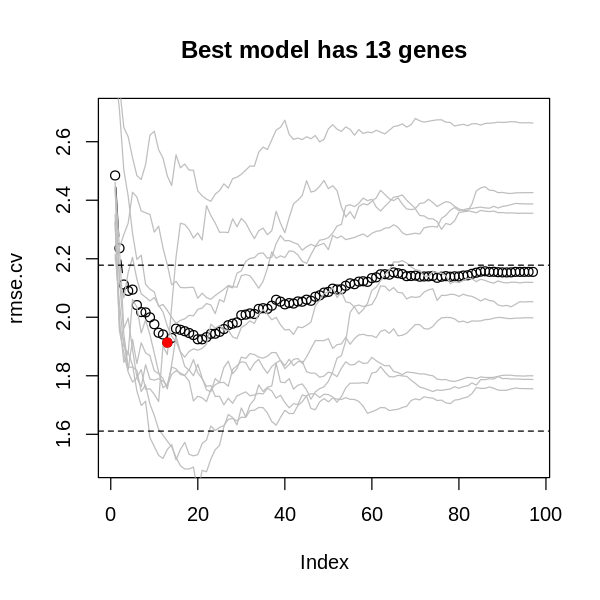

In [102]:
rmse.cv = sqrt(apply(cv.errors,2,mean))
options(repr.plot.width = 5, repr.plot.height = 5)
plot(rmse.cv,type='b', pch=1, ylim=c(1.5,2.7), main = paste0("Best model has ", which.min(rmse.cv)," genes"))
for(i in 1:nfolds){
    lines(sqrt(cv.errors[i,]), col='grey')
}
points(which.min(rmse.cv),rmse.cv[which.min(rmse.cv)] , pch=19, col='red')

# Lets plot a dynamic range to show which models could
# be considered the best just by random variation
meanOFmodels <- apply(sqrt(cv.errors), 2, mean)[which.min(rmse.cv)]
sdOFmodels <- apply(sqrt(cv.errors), 2, sd)[which.min(rmse.cv)]

# Models in this range are 1 sd apart from the "best" model
abline(h = c(round(meanOFmodels - sdOFmodels, 3), round(meanOFmodels + sdOFmodels, 3)), lty=c(2,2))

nmodel <- 10
print("Within 1 Sd I can see model 10 has a decent performance. I may chose that over the best simply because it is smaller: ")
print(paste0(names(coef(regsubsets(pseudotime~., data = Chrono, nvmax = nmodel, method = 'forward'), id=nmodel))[-1], collapse=' '))